In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk

In [26]:
from scipy.stats import pearsonr
import sklearn.ensemble  
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
import nltk


In [27]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')# use / not this \

# df = pd.merge(
#             df,
#             df1,
#             how='outer',
#             on='tweet_id',
#             indicator=True
# )

In [28]:
df.head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2


In [29]:
df1.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1819 non-null   int64 
 1   tweet     1819 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [31]:
#ANALYZIG THE DATA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   7274 non-null   int64 
 1   tweet      7273 non-null   object
 2   sentiment  7274 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


<Axes: xlabel='sentiment', ylabel='count'>

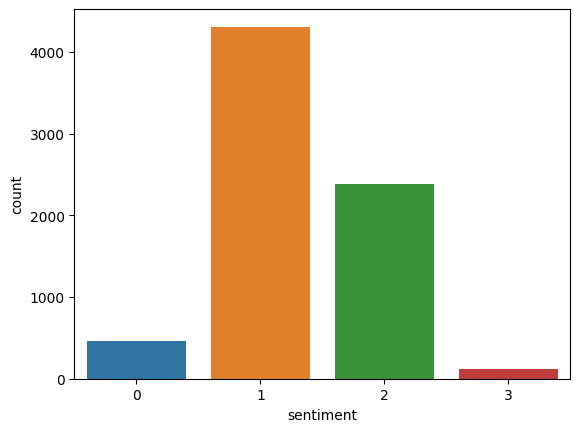

In [33]:
sns.countplot(x="sentiment",data=df)
#0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

In [34]:
# DATA WRANGLING

In [35]:
df.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

<Axes: >

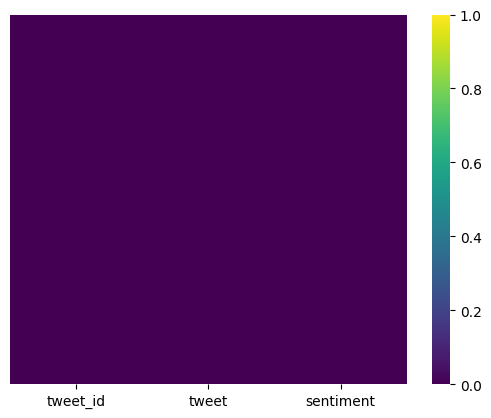

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#1 Missing Value 

In [37]:
df.drop("tweet_id",axis=1,inplace=True)

In [38]:
df.head(10)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
5,#technews One lone dude awaits iPad 2 at Apple...,1
6,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,NU user RT @mention New #UberSocial for #iPhon...,1
8,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,I think I might go all weekend without seeing ...,2


In [39]:
df.dropna(inplace=True)
#Dropping The Column

In [40]:
df.isnull().sum()

tweet        0
sentiment    0
dtype: int64

<Axes: >

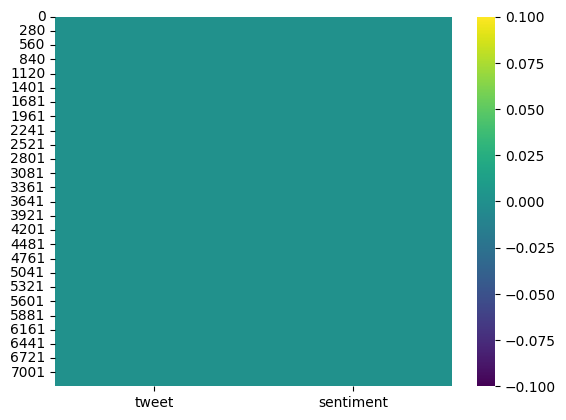

In [41]:
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis") 
# Perfectly Clean Data

In [42]:
df.head(5)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [43]:
# EXPLORATORY DATA ANALYSIS

In [44]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,#sxswnui #sxsw #apple defining language of tou...,12
1,Learning ab Google doodles! All doodles should...,19
2,one of the most in-your-face ex. of stealing t...,23
3,This iPhone #SXSW app would b pretty awesome i...,19
4,Line outside the Apple store in Austin waiting...,15


In [45]:
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,#sxswnui #sxsw #apple defining language of tou...,89
1,Learning ab Google doodles! All doodles should...,143
2,one of the most in-your-face ex. of stealing t...,132
3,This iPhone #SXSW app would b pretty awesome i...,125
4,Line outside the Apple store in Austin waiting...,77


In [46]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,#sxswnui #sxsw #apple defining language of tou...,6.500000
1,Learning ab Google doodles! All doodles should...,6.578947
2,one of the most in-your-face ex. of stealing t...,5.000000
3,This iPhone #SXSW app would b pretty awesome i...,5.631579
4,Line outside the Apple store in Austin waiting...,4.500000


In [47]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
from nltk.corpus import stopwords
import pandas as pd

# Assuming you have already loaded your data into a DataFrame named 'df'
stop = stopwords.words('english')
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['tweet', 'stopwords']].head()


,tweet,stopwords
0,#sxswnui #sxsw #apple defining language of tou...,2
1,Learning ab Google doodles! All doodles should...,4
2,one of the most in-your-face ex. of stealing t...,7
3,This iPhone #SXSW app would b pretty awesome i...,4
4,Line outside the Apple store in Austin waiting...,4


In [49]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['tweet','hastags']].head()

,tweet,hastags
0,#sxswnui #sxsw #apple defining language of tou...,3
1,Learning ab Google doodles! All doodles should...,2
2,one of the most in-your-face ex. of stealing t...,1
3,This iPhone #SXSW app would b pretty awesome i...,3
4,Line outside the Apple store in Austin waiting...,1


In [51]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags
0,#sxswnui #sxsw #apple defining language of tou...,1,12,89,6.500000,2,3
1,Learning ab Google doodles! All doodles should...,1,19,143,6.578947,4,2
2,one of the most in-your-face ex. of stealing t...,2,23,132,5.000000,7,1
3,This iPhone #SXSW app would b pretty awesome i...,0,19,125,5.631579,4,3
4,Line outside the Apple store in Austin waiting...,1,15,77,4.500000,4,1


In [52]:
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['tweet','numerics']].head()
#Total Number Present

,tweet,numerics
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,0
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,0


In [53]:
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['tweet','upper']].head()
#Upper Case Characters Presnt in Datset

,tweet,upper
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,1
4,Line outside the Apple store in Austin waiting...,1


In [54]:
df.tail(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
7269,@mention Google plze Tammi. I'm in middle of ...,1,16,93,5.200000,4,1,0,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,15,91,5.133333,2,5,0,1
7271,RT @mention Aha! Found proof of lactation room...,1,22,140,5.409091,5,1,0,2
7272,We just launched our iPad app at #SXSW! Get al...,1,18,92,4.166667,6,1,0,2
7273,"The next fin serv battle is vs Apple, GOOG, Mo...",1,23,137,5.000000,4,2,0,2


In [55]:
# DATA PREPROCESSING AND CLEANING

In [56]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'].head()
#Making Everything in LowerCase No Repeatations

0    #sxswnui #sxsw #apple defining language of tou...
1    learning ab google doodles! all doodles should...
2    one of the most in-your-face ex. of stealing t...
3    this iphone #sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [57]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()
#REMOVING THE PUNCTUCATION

0    #sxswnui #sxsw #apple defining language of tou...
1    learning ab google doodles! all doodles should...
2    one of the most in-your-face ex. of stealing t...
3    this iphone #sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [58]:
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()
# Removing Stopwords

0    #sxswnui #sxsw #apple defining language touch ...
1    learning ab google doodles! doodles light, fun...
2    one in-your-face ex. stealing show yrs rt @men...
3    iphone #sxsw app would b pretty awesome crash ...
4    line outside apple store austin waiting new ip...
Name: tweet, dtype: object

In [59]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
#Commonly Used Words And Thier Count

In [60]:
freq

#sxsw       6290
@mention    5366
{link}      3405
rt          2321
google      1493
ipad        1486
apple       1318
store        985
new          858
iphone       808
Name: count, dtype: int64

In [61]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['tweet'].head()
#Removing the Common Words

0    #sxswnui #apple defining language touch differ...
1    learning ab doodles! doodles light, funny &amp...
2    one in-your-face ex. stealing show yrs &quot;a...
3    app would b pretty awesome crash every 10mins ...
4                          line outside austin waiting
Name: tweet, dtype: object

In [62]:
freq1 = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:]
# Rare Words From Dataset

In [63]:
freq1

cure:            1
droppin          1
goers!           1
doubt!           1
stimulating      1
&lt;&amp;        1
onsulting        1
#normalpeople    1
#overheard       1
#bankinnovate    1
Name: count, dtype: int64

In [64]:
freq1 = list(freq1.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
df['tweet'].head()
#Removing Rare Words From Dataset

0    #sxswnui #apple defining language touch differ...
1    learning ab doodles! doodles light, funny &amp...
2    one in-your-face ex. stealing show yrs &quot;a...
3    app would b pretty awesome crash every 10mins ...
4                          line outside austin waiting
Name: tweet, dtype: object

In [65]:
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))
#Words Correction analytics and analtycs

0    #sxswnui #apple defining language touch differ...
1    learning ab doubles! doubles light, funny &amp...
2    one in-your-face ex. stealing show yes &quit;a...
3    pp would b pretty awesome crash every 10mins e...
4                          line outside austin waiting
Name: tweet, dtype: object

In [69]:
#ADVANCED TEXT PROCESSING



In [71]:
tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1
#Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

,words,tf
0,learning,1
1,ab,1
2,doodles!,1
3,doodles,1
4,"light,",1
5,funny,1
6,&amp;,1
7,"innovative,",1
8,exceptions,1
9,significant,1


In [72]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['tweet'].str.contains(word)])))
tf1
#The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing
#in all the documents.

,words,tf,idf
0,learning,1,6.326975
1,ab,1,2.780457
2,doodles!,1,8.891924
3,doodles,1,5.800882
4,"light,",1,7.505630
5,funny,1,5.896192
6,&amp;,1,2.493329
7,"innovative,",1,8.891924
8,exceptions,1,8.891924
9,significant,1,8.891924


In [73]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1
#TF-IDF is the multiplication of the TF and IDF which we calculated above.

,words,tf,idf,tfidf
0,learning,1,6.326975,6.326975
1,ab,1,2.780457,2.780457
2,doodles!,1,8.891924,8.891924
3,doodles,1,5.800882,5.800882
4,"light,",1,7.505630,7.505630
5,funny,1,5.896192,5.896192
6,&amp;,1,2.493329,2.493329
7,"innovative,",1,8.891924,8.891924
8,exceptions,1,8.891924,8.891924
9,significant,1,8.891924,8.891924


In [74]:
df_copy=df

In [75]:
df_copy.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,1,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",1,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [76]:
# df.drop(["word_count","char_count","avg_word","hastags","numerics","upper","stopwords"],inplace=True,axis=1)

In [79]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,1,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",1,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [81]:
df.to_csv('newtwitter.csv') 

In [82]:
!pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ---------------------------------------- 152.1/152.1 kB 4.4 MB/s eta 0:00:00


In [83]:
from wordcloud import WordCloud
from PIL import Image
import requests

In [84]:
all_words = ' '.join([text for text in df['tweet']])

In [85]:
mask = np.array(Image.open(requests.get('https://lofrev.net/wp-content/photos/2016/07/twitter_logo.jpg', stream=True).raw))

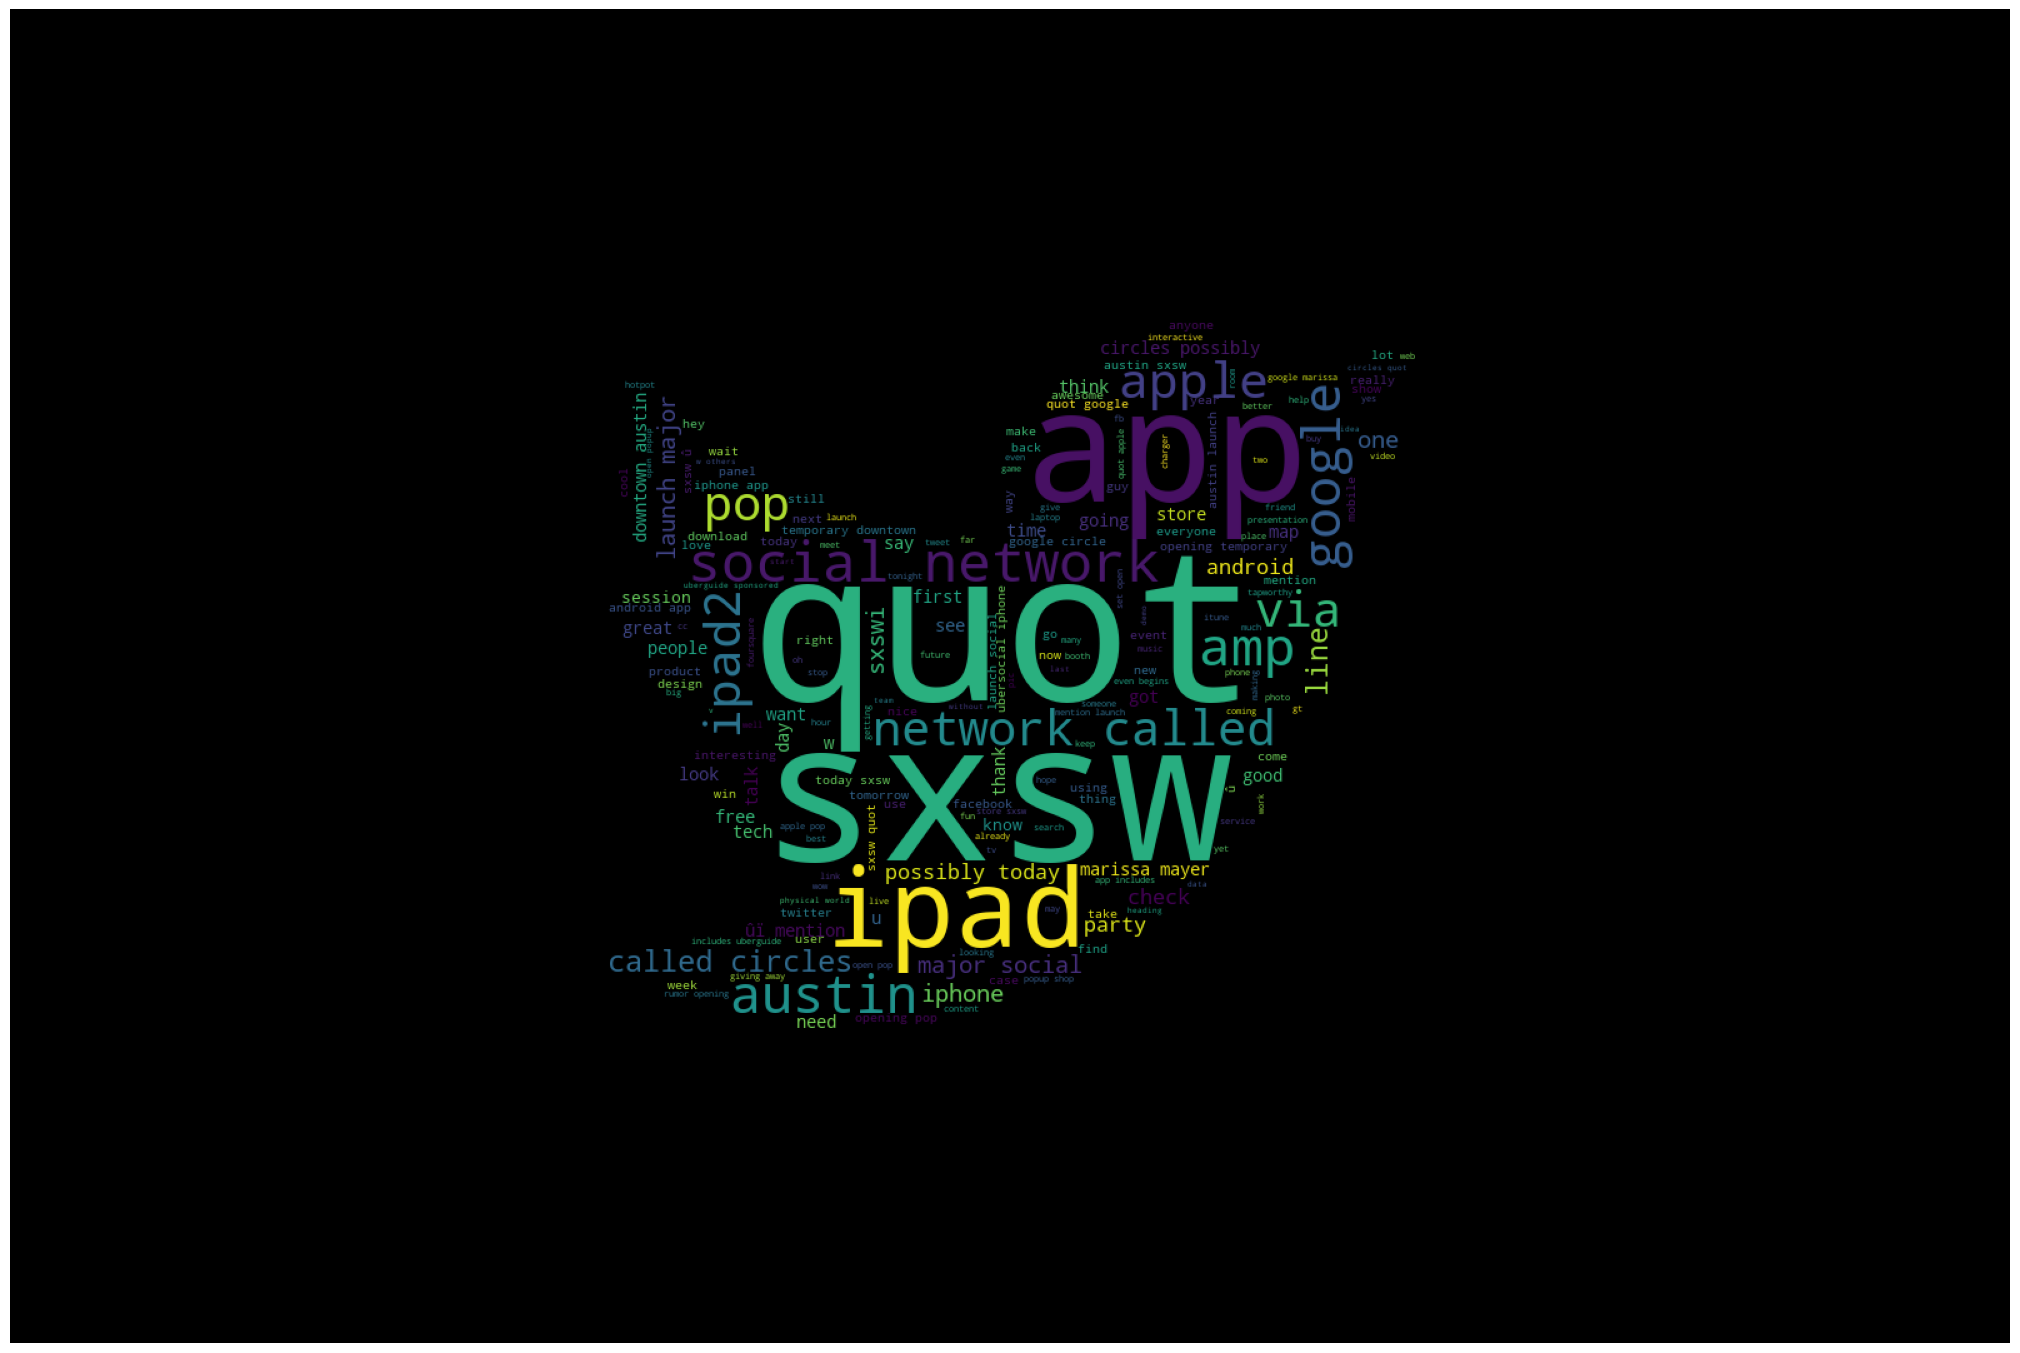

In [86]:
def generate_wordcloud(all_words, mask):
    word_cloud = WordCloud(width = 900, height = 600, background_color='black', mask=mask).generate(all_words)
    plt.figure(figsize=(20,18),facecolor = 'white', edgecolor='blue')
    plt.figure
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(all_words,mask)

In [87]:
# MODEL 1

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(['sentiment'], axis = 1), df_copy['sentiment'], test_size=0.33, random_state=42)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df_copy['tweet'])

train_vect

<7273x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 41821 stored elements in Compressed Sparse Row format>

In [93]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,1,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",1,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [94]:
df_copy['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0          (0.15, 0.65)
1    (0.38125, 0.89375)
2            (0.0, 0.0)
3          (0.625, 1.0)
4           (0.0, 0.05)
Name: tweet, dtype: object

In [95]:
df.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,1,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",1,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [96]:
df_copy['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
df_copy[['tweet','sentiment']].head()

,tweet,sentiment
0,#sxswnui #apple defining language touch differ...,0.15000
1,"learning ab doodles! doodles light, funny &amp...",0.38125
2,one in-your-face ex. stealing show yrs &quot;a...,0.00000
3,app would b pretty awesome crash every 10mins ...,0.62500
4,line outside austin waiting,0.00000


In [97]:
df_copy.sentiment.value_counts()

sentiment
 0.000000    3336
 0.500000     313
 0.250000     176
 1.000000     172
 0.200000     161
             ... 
-0.494141       1
 0.500000       1
 0.242857       1
 0.242857       1
 0.180208       1
Name: count, Length: 569, dtype: int64

In [98]:
df_copy['sentiment']

0       0.15000
1       0.38125
2       0.00000
3       0.62500
4       0.00000
         ...   
7269    0.06250
7270    0.00000
7271   -0.02500
7272    0.32500
7273    0.00000
Name: sentiment, Length: 7273, dtype: float64

In [99]:
#TESTING

In [100]:
from sklearn.metrics import classification_report
y_true = df['sentiment']
y_pred = df_copy['sentiment']
#0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell
target_names = ['0', '1', '2','3']
# print(classification_report(y_true, y_pred, target_names=target_names)

In [101]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7273 entries, 0 to 7273
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       7273 non-null   object 
 1   sentiment   7273 non-null   float64
 2   word_count  7273 non-null   int64  
 3   char_count  7273 non-null   int64  
 4   avg_word    7273 non-null   float64
 5   stopwords   7273 non-null   int64  
 6   hastags     7273 non-null   int64  
 7   numerics    7273 non-null   int64  
 8   upper       7273 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 826.2+ KB


In [102]:
y_true.head(20)

0     0.15000
1     0.38125
2     0.00000
3     0.62500
4     0.00000
5     0.00000
6     0.00000
7     0.00000
8     0.40000
9     0.00000
10    0.00000
11    0.00000
12    0.00000
13    0.00000
14    0.00000
15    0.00000
16    0.45000
17    0.50000
18    0.00000
19    0.00000
Name: sentiment, dtype: float64

In [103]:
y_pred = y_pred.abs()

In [104]:
y_pred = y_pred.round(decimals=0)

In [105]:
y_pred

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7269    0.0
7270    0.0
7271    0.0
7272    0.0
7273    0.0
Name: sentiment, Length: 7273, dtype: float64

In [107]:
from sklearn.metrics import classification_report


In [108]:
# Assuming y_true and y_pred are numpy arrays or lists representing the true and predicted labels
print("Data type of y_true:", type(y_true))
print("Data type of y_pred:", type(y_pred))

# Check the unique values in y_true and y_pred
print("Unique classes in y_true:", set(y_true))
print("Unique classes in y_pred:", set(y_pred))


Data type of y_true: <class 'pandas.core.series.Series'>
Data type of y_pred: <class 'pandas.core.series.Series'>
Unique classes in y_true: {0.0, 0.625, 0.5, 0.25, -0.25, -0.078125, 0.5625, 1.0, 0.53125, -0.375, 0.375, 0.0625, 0.21875, 0.78125, 0.494140625, 0.75, -0.43333333333333324, 0.79296875, 0.125, 0.6103515625, 0.4375, 0.109375, 0.3125, -0.125, 0.15625, -0.5, 0.875, 0.11818181818181818, -0.24999999999999997, 0.1986111111111111, -0.23333333333333336, 0.20416666666666664, 0.016666666666666635, 0.009375000000000022, 0.011904761904761899, 0.011111111111111108, -0.004761904761904708, 0.011111111111111112, -0.07692307692307693, 0.04791666666666666, 0.26666666666666666, 0.2738095238095238, 5.551115123125783e-17, 0.37500000000000006, 0.03229166666666666, -0.13958333333333334, 0.20416666666666666, 0.016666666666666666, 0.14166666666666666, -0.4, 0.2875, 0.475, 0.46875, 0.703125, 0.744140625, 0.9765625, -0.40625, 0.03125, 0.09375, 0.1875, 0.390625, -0.0625, 0.32083333333333336, -0.23333333

In [110]:
#MODEL II - 

In [111]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,0.15000,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",0.38125,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,0.00000,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0.62500,19,125,5.631579,4,3,0,1
4,line outside austin waiting,0.00000,15,77,4.500000,4,1,0,1


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True
                            )
train_vectors = vectorizer.fit_transform(df_copy['tweet'])
test_vectors = vectorizer.transform(df_copy['tweet'])

In [113]:
train_vectors

<7273x2061 sparse matrix of type '<class 'numpy.float64'>'
	with 54552 stored elements in Compressed Sparse Row format>

In [114]:
df_copy

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,#sxswnui #apple defining language touch differ...,0.15000,12,89,6.500000,2,3,0,0
1,"learning ab doodles! doodles light, funny &amp...",0.38125,19,143,6.578947,4,2,0,0
2,one in-your-face ex. stealing show yrs &quot;a...,0.00000,23,132,5.000000,7,1,0,2
3,app would b pretty awesome crash every 10mins ...,0.62500,19,125,5.631579,4,3,0,1
4,line outside austin waiting,0.00000,15,77,4.500000,4,1,0,1
...,...,...,...,...,...,...,...,...,...
7269,plze tammi. i'm middle craziness everything so...,0.06250,16,93,5.200000,4,1,0,1
7270,÷¼ set? ÷_ ÷_ #edchat #musedchat #sxswi #ne...,0.00000,15,91,5.133333,2,5,0,1
7271,"aha! found proof lactation room, excuse me, &q...",-0.02500,22,140,5.409091,5,1,0,2
7272,launched app #sxsw! get details + first editio...,0.32500,18,92,4.166667,6,1,0,2


In [116]:
print("Data type of labels:", df_copy['sentiment'].dtype)


Data type of labels: float64


In [117]:
print("Unique classes in labels:", set(df_copy['sentiment']))


Unique classes in labels: {0.0, 0.625, 0.5, 0.25, -0.25, -0.078125, 0.5625, 1.0, 0.53125, -0.375, 0.375, 0.0625, 0.21875, 0.78125, 0.494140625, 0.75, -0.43333333333333324, 0.79296875, 0.125, 0.6103515625, 0.4375, 0.109375, 0.3125, -0.125, 0.15625, -0.5, 0.875, 0.11818181818181818, -0.24999999999999997, 0.1986111111111111, -0.23333333333333336, 0.20416666666666664, 0.016666666666666635, 0.009375000000000022, 0.011904761904761899, 0.011111111111111108, -0.004761904761904708, 0.011111111111111112, -0.07692307692307693, 0.04791666666666666, 0.26666666666666666, 0.2738095238095238, 5.551115123125783e-17, 0.37500000000000006, 0.03229166666666666, -0.13958333333333334, 0.20416666666666666, 0.016666666666666666, 0.14166666666666666, -0.4, 0.2875, 0.475, 0.46875, 0.703125, 0.744140625, 0.9765625, -0.40625, 0.03125, 0.09375, 0.1875, 0.390625, -0.0625, 0.32083333333333336, -0.2333333333333333, 0.21714285714285717, 0.273015873015873, 0.028571428571428564, 0.016666666666666705, -0.07999999999999997

In [118]:
threshold = 0.5  # Example threshold for converting continuous to binary sentiment
df_copy['sentiment'] = df_copy['sentiment'].apply(lambda x: 'positive' if x >= threshold else 'negative')


In [119]:
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df_copy['sentiment'])
t1 = time.time()
y_pred = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1 - t0
time_linear_predict = t2 - t1


In [121]:
import warnings
warnings.filterwarnings('always')

In [122]:
# result
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_copy['sentiment'], y_pred, output_dict=True)

Training time: 1.669120s; Prediction time: 1.271537s


In [123]:
#Since Classification Report could not be generated due ti MetricWarning we use sklearn.metrics to calculate performance measure of our model

from sklearn.metrics import f1_score, precision_recall_fscore_support, accuracy_score
precision,recall,_,_ = precision_recall_fscore_support(
                                                        df_copy['sentiment'], 
                                                        y_pred,
                                                        average='weighted',
                                                        warn_for=tuple()
                                                    )

print("F1 Score: ",f1_score(df_copy['sentiment'], y_pred, average='weighted', labels=np.unique(y_pred)),
      "\nPrecision:",precision,"\nRecall:",recall, "\nAccuracy Score:", accuracy_score(df_copy['sentiment'], y_pred)

     )

F1 Score:  0.9538337969123398 
Precision: 0.9551207991804848 
Recall: 0.9560016499381273 
Accuracy Score: 0.9560016499381273


In [131]:
df_copy['sentiment'].value_counts()



sentiment
negative    6272
positive    1001
Name: count, dtype: int64